<a href="https://colab.research.google.com/github/vbanai/Multi-label-classification_DOLPHIN_HORSE_Part1_Pytorch-Conv2DandResnet9_Tensorflow_DNNandCNN/blob/main/TF_Resnet_9_50_Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#------Experimenting with Tensorflow CNN model with DATAAUGMENTATION ------
#------ with dataaugmentation I reached worse result with TF than without it

import os
import cv2
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
path="."
os.chdir(path)
os.makedirs("train")
os.makedirs("valid")
os.makedirs("test")

In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/dolphin_train.rar').extractall('/content/train/')
Archive('/content/drive/MyDrive/horse_train.rar').extractall('/content/train/')
Archive("/content/drive/MyDrive/dolphin_horse_train.rar").extractall('/content/train/')
Archive('/content/drive/MyDrive/horse_valid.rar').extractall('/content/valid/')
Archive('/content/drive/MyDrive/dolphin_valid.rar').extractall('/content/valid/')
Archive('/content/drive/MyDrive/dolphin_horse_valid.rar').extractall('/content/valid/')
Archive('/content/drive/MyDrive/DolphinTest.rar').extractall('/content/test/')
Archive('/content/drive/MyDrive/HorseTest.rar').extractall('/content/test/')
Archive("/content/drive/MyDrive/DolphinHorseTest.rar").extractall('/content/test/')


     |████████████████████████████████| 81kB 3.5MB/s 


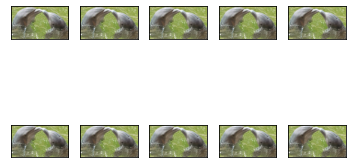

In [ ]:
gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
                                                         #rotation_range=20,
                                                         #horizontal_flip=True,
                                                         #width_shift_range=0.2, 
                                                         #height_shift_range=0.2,
                                                         #shear_range=0.2, 
                                                         #zoom_range=0.2)


data_augmentation=keras.Sequential([ 
                        layers.experimental.preprocessing.RandomContrast(factor=0.9),
                        layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
                        layers.experimental.preprocessing.RandomRotation(0.2),
                        #layers.experimental.preprocessing.RandomCrop(30,30),
                        layers.experimental.preprocessing.RandomZoom(0.3)
                      
                             

])

# Checking how to create more image from 1

image_path="/content/test/DolphinTest/aagewag.jpg"
#image= cv2.imread(image_path)
image2 = np.expand_dims(cv2.imread(image_path), axis=0)
aug_image=gen.flow(image2)
aug_images=[next(aug_image)[0] for i in range(10)]

def show2(batch):    
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(batch[i])
        plt.xticks([])
        plt.yticks([])
        
        
show2(aug_images)

#plt.imshow(next(aug_image)[0])



In [ ]:
image_path="/content/test/DolphinTest/aagewag.jpg"
#image= cv2.imread(image_path)
image2 = np.expand_dims(cv2.imread(image_path), axis=0)
aug_image=data_augmentation(image2)

print(type(aug_image))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
#--------------Creating TRAINING, VALIDATION AND TEST NP ARRAY FOR THE CNN MODEL------

datadir="/content/train/" 
train_categories=['horse_train/', 'dolphin_train/', 'dolphin_horse_train/']

dataset_train=[]
def create_train_data():
  for category in train_categories:
    path_train=os.path.join(datadir, category)
    if category=="horse_train/":
      class_num_train=[1,0]
    if category=="dolphin_train/":
      class_num_train=[0,1]
    if category=="dolphin_horse_train/":
      class_num_train=[1,1]
    for img in os.listdir(path_train):  
      try:
        img_array=cv2.imread(os.path.join(path_train, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64)) 
        new_array1=new_array/255 
        dataset_train.append([new_array1, class_num_train]) 
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_train.append([next(aug_image)[0], class_num_train])
      except Exception as e:
        print(e)

create_train_data()

import random
random.shuffle(dataset_train)

inputs_train=[]
targets_train=[]

for image, label in dataset_train:
  inputs_train.append(image)
  targets_train.append(label)

#---creating np array from the input images
arr_inputs_train = np.array(inputs_train)
arr_inputs_float_train=arr_inputs_train.astype('float32')


arr_inputs_train_targets = np.array(targets_train)
arr_inputs_float_train_targets=arr_inputs_train_targets.astype('float32')




datadir="/content/valid/" 
valid_categories=['horse_valid/', 'dolphin_valid/', 'dolphin_horse_valid/']

dataset_valid=[]
def create_validation_data():
  for category in valid_categories:
    path_valid=os.path.join(datadir, category)
    if category=="horse_valid/":
      class_num_valid=[1,0]
    if category=="dolphin_valid/":
      class_num_valid=[0,1]
    if category=="dolphin_horse_valid/":
      class_num_valid=[1,1]
    for img in os.listdir(path_valid):  
      try:
        img_array=cv2.imread(os.path.join(path_valid, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))
        new_array1=new_array/255 
        dataset_valid.append([new_array1, class_num_valid])  
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_valid.append([next(aug_image)[0], class_num_valid])
      except Exception as e:
        print(e)

create_validation_data()

import random
random.shuffle(dataset_valid)

inputs_val=[]
targets_val=[]

for image, label in dataset_valid:
  inputs_val.append(image)
  targets_val.append(label)

#---creating np array from the input images
arr_inputs_val = np.array(inputs_val)
arr_inputs_float_val=arr_inputs_val.astype('float32')

arr_inputs_val_targets = np.array(targets_val)
arr_inputs_float_val_targets=arr_inputs_val_targets.astype('float32')


datadir="/content/test/" 
test_categories=['HorseTest/', 'DolphinTest/', 'DolphinHorseTest/']

dataset_test=[]
def create_test_data():
  for category in test_categories:
    path_test=os.path.join(datadir, category)
    if category=="HorseTest/":
      class_num_test=[1,0]
    if category=="DolphinTest/":
      class_num_test=[0,1]
    if category=="DolphinHorseTest/":
      class_num_test=[1,1]
    for img in os.listdir(path_test):  
      try:
        img_array=cv2.imread(os.path.join(path_test, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64)) 
        new_array1=new_array/255 
        dataset_test.append([new_array1, class_num_test])
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_test.append([next(aug_image)[0], class_num_test])
      except Exception as e:
        print(e)

create_test_data()

import random
random.shuffle(dataset_test)

inputs_test=[]
targets_test=[]

for image, label in dataset_test:
  inputs_test.append(image)
  targets_test.append(label)

#---creating np array from the input images
arr_inputs_test = np.array(inputs_test)
arr_inputs_float_test=arr_inputs_test.astype('float32')

arr_inputs_test_targets = np.array(targets_test)
arr_inputs_float_test_targets=arr_inputs_test_targets.astype('float32')


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
modelCNN = keras.models.Sequential()
modelCNN.add(data_augmentation)
modelCNN.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(64,64,3)))  #64
modelCNN.add(layers.MaxPool2D((2,2)))   #32
modelCNN.add(layers.Conv2D(64, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #16
modelCNN.add(layers.Conv2D(128, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #8
modelCNN.add(layers.Conv2D(256, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #4
modelCNN.add(layers.MaxPool2D((2,2)))  #2
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(1024, activation='relu'))
modelCNN.add(layers.Dropout(0.2))
modelCNN.add(layers.Dense(512, activation='relu'))
modelCNN.add(layers.Dropout(0.2))
modelCNN.add(layers.Dense(2, activation='sigmoid'))


# 2.) lOSS, OPTIMIZER, METRICS
loss = keras.losses.BinaryCrossentropy(from_logits=False)  #SparseCategoricalCrossentropy as we have single classes(1,2), 
                                                                    #if it is vector (0,1,0,0....) CategoricalCrossentropy. 
                                                                    #From_logits=True as we didn't build the softmax into the model
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

# 3.) CONFIGURATION OF THE MODEL

modelCNN.compile(loss=loss, optimizer=optim, metrics=metrics)

# 4.) TRAINING
batch_size = 32
epochs = 40

modelCNN.fit(arr_inputs_float_train, arr_inputs_float_train_targets,
             validation_data=(arr_inputs_float_val, arr_inputs_float_val_targets), 
             batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
15/15 - 31s - loss: 0.6388 - accuracy: 0.6385 - val_loss: 0.6933 - val_accuracy: 0.7822
Epoch 2/40
15/15 - 0s - loss: 0.5508 - accuracy: 0.7468 - val_loss: 0.3409 - val_accuracy: 0.8911
Epoch 3/40
15/15 - 0s - loss: 0.4384 - accuracy: 0.7944 - val_loss: 0.3022 - val_accuracy: 0.8713
Epoch 4/40
15/15 - 0s - loss: 0.4121 - accuracy: 0.8203 - val_loss: 0.2589 - val_accuracy: 0.8614
Epoch 5/40
15/15 - 0s - loss: 0.3975 - accuracy: 0.7987 - val_loss: 0.2534 - val_accuracy: 0.8119
Epoch 6/40
15/15 - 0s - loss: 0.4043 - accuracy: 0.7900 - val_loss: 0.3813 - val_accuracy: 0.8614
Epoch 7/40
15/15 - 0s - loss: 0.5301 - accuracy: 0.7532 - val_loss: 0.4265 - val_accuracy: 0.8416
Epoch 8/40
15/15 - 0s - loss: 0.4399 - accuracy: 0.8117 - val_loss: 0.2537 - val_accuracy: 0.7822
Epoch 9/40
15/15 - 0s - loss: 0.3569 - accuracy: 0.8030 - val_loss: 0.2131 - val_accuracy: 0.8614
Epoch 10/40
15/15 - 0s - loss: 0.3389 - accuracy: 0.8139 - val_loss: 0.2238 - val_accuracy: 0.8812
Epoch 11/40
15/15 

In [ ]:

modelCNN.evaluate(arr_inputs_float_test, arr_inputs_float_test_targets)

3/3 [==============================] - 0s 54ms/step - loss: 0.2224 - accuracy: 0.7973


[0.22243528068065643, 0.7972972989082336]

Experiment with resnet 50

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
datadir="/content/train/" 
train_categories=['horse_train/', 'dolphin_train/', 'dolphin_horse_train/']

dataset_train=[]
def create_train_data():
  for category in train_categories:
    path_train=os.path.join(datadir, category)
    if category=="horse_train/":
      class_num_train=[1,0]
    if category=="dolphin_train/":
      class_num_train=[0,1]
    if category=="dolphin_horse_train/":
      class_num_train=[1,1]
    for img in os.listdir(path_train):  
      try:
        img_array=cv2.imread(os.path.join(path_train, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (224, 224)) 
        new_array1=new_array/255 
        #scaling=StandardScaler()
        #new_array1=scaling.fit_transform(new_array.reshape(-1, new_array.shape[-1])).reshape(new_array)
        dataset_train.append([new_array1, class_num_train]) 
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_train.append([next(aug_image)[0], class_num_train])
      except Exception as e:
        print(e)

create_train_data()

import random
random.shuffle(dataset_train)

inputs_train=[]
targets_train=[]

for image, label in dataset_train:
  inputs_train.append(image)
  targets_train.append(label)

#---creating np array from the input images
arr_inputs_train = np.array(inputs_train)
arr_inputs_float_train=arr_inputs_train.astype('float32')


arr_inputs_train_targets = np.array(targets_train)
arr_inputs_float_train_targets=arr_inputs_train_targets.astype('float32')




datadir="/content/valid/" 
valid_categories=['horse_valid/', 'dolphin_valid/', 'dolphin_horse_valid/']

dataset_valid=[]
def create_validation_data():
  for category in valid_categories:
    path_valid=os.path.join(datadir, category)
    if category=="horse_valid/":
      class_num_valid=[1,0]
    if category=="dolphin_valid/":
      class_num_valid=[0,1]
    if category=="dolphin_horse_valid/":
      class_num_valid=[1,1]
    for img in os.listdir(path_valid):  
      try:
        img_array=cv2.imread(os.path.join(path_valid, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (224, 224))
        new_array1=new_array/255 
        #scaling=StandardScaler()
        #new_array1=scaling.fit_transform(new_array.reshape(-1, new_array.shape[-1])).reshape(new_array)
        dataset_valid.append([new_array1, class_num_valid])  
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_valid.append([next(aug_image)[0], class_num_valid])
      except Exception as e:
        print(e)

create_validation_data()

import random
random.shuffle(dataset_valid)

inputs_val=[]
targets_val=[]

for image, label in dataset_valid:
  inputs_val.append(image)
  targets_val.append(label)

#---creating np array from the input images
arr_inputs_val = np.array(inputs_val)
arr_inputs_float_val=arr_inputs_val.astype('float32')

arr_inputs_val_targets = np.array(targets_val)
arr_inputs_float_val_targets=arr_inputs_val_targets.astype('float32')


datadir="/content/test/" 
test_categories=['HorseTest/', 'DolphinTest/', 'DolphinHorseTest/']

dataset_test=[]
def create_test_data():
  for category in test_categories:
    path_test=os.path.join(datadir, category)
    if category=="HorseTest/":
      class_num_test=[1,0]
    if category=="DolphinTest/":
      class_num_test=[0,1]
    if category=="DolphinHorseTest/":
      class_num_test=[1,1]
    for img in os.listdir(path_test):  
      try:
        img_array=cv2.imread(os.path.join(path_test, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (224, 224)) 
        new_array1=new_array/255 
        #scaling=StandardScaler()
        #scalers = {}
        #new_array1=scaling.fit_transform(new_array.reshape(-1, new_array.shape[-1])).reshape(new_array)
        dataset_test.append([new_array1, class_num_test])
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_test.append([next(aug_image)[0], class_num_test])
      except Exception as e:
        print(e)

create_test_data()

import random
random.shuffle(dataset_test)

inputs_test=[]
targets_test=[]

for image, label in dataset_test:
  inputs_test.append(image)
  targets_test.append(label)

#---creating np array from the input images
arr_inputs_test = np.array(inputs_test)
arr_inputs_float_test=arr_inputs_test.astype('float32')

arr_inputs_test_targets = np.array(targets_test)
arr_inputs_float_test_targets=arr_inputs_test_targets.astype('float32')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
def identity_block(X, f, filters):

    # Retrieve Filters
    F1, F2, F3 = filters  # F1=64,F2=64,256
    
    X_shortcut = X
    
    # First  layer
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    
    # Second  layer
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Third  layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    # Final step: Add shortcut value to F(X), and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def convolutional_block(X, f, filters, s = 2):

    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3)(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3), classes=2):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) 
    X = BatchNormalization(axis=3)(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=2)
 
   
    # below 3 lines are the conv layers from convolutional_block function defined above
    #X = Conv2D(F1, (1, 1), strides = (s,s))(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256]) 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
  
    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)


    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 1)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X=tf.keras.layers.Dropout(0.2)(X)
    #X=Dropout(0.2)(X)
    X=Dense(1024, activation='relu')(X)
    X=Dense(512, activation='relu')(X)
    X = Dense(classes, activation='sigmoid', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
  
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (224, 224, 3), classes = 2)

In [ ]:
#trying lr scheduler

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optim = keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(optimizer=optim, loss='BinaryCrossentropy', metrics=['accuracy'])

history=model.fit(arr_inputs_float_train, arr_inputs_float_train_targets,
          validation_data=(arr_inputs_float_val, arr_inputs_float_val_targets),
          epochs = 100, callbacks=[lr_schedule], batch_size = 32)

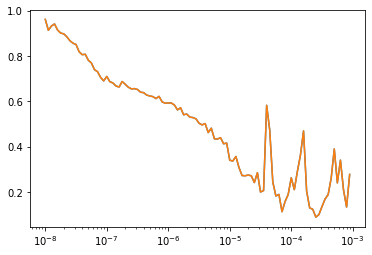

In [ ]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.plot(lrs, history.history["loss"])
plt.semilogx(lrs, history.history["loss"])
#plt.axis([1e-8, 1e-3, 0, 300])

In [ ]:
a=history.history["loss"]
b=a.index(min(a))
print(lrs[b])

0.0002511886431509582


In [ ]:



optim = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optim, loss='BinaryCrossentropy', metrics=['accuracy'])


model.fit(arr_inputs_float_train, arr_inputs_float_train_targets,
          validation_data=(arr_inputs_float_val, arr_inputs_float_val_targets),
          epochs = 100, batch_size = 32)





/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
15/15 [==============================] - 28s 912ms/step - loss: 2.2319 - accuracy: 0.6255 - val_loss: 3.7916 - val_accuracy: 0.5941
Epoch 2/100
15/15 [==============================] - 9s 582ms/step - loss: 0.8202 - accuracy: 0.7084 - val_loss: 23.8373 - val_accuracy: 0.5941
Epoch 3/100
15/15 [==============================] - 9s 583ms/step - loss: 0.4685 - accuracy: 0.7961 - val_loss: 878.1693 - val_accuracy: 0.6040
Epoch 4/100
15/15 [==============================] - 9s 583ms/step - loss: 0.4013 - accuracy: 0.8223 - val_loss: 728.3929 - val_accuracy: 0.5941
Epoch 5/100
15/15 [==============================] - 9s 582ms/step - loss: 0.3659 - accuracy: 0.8487 - val_loss: 295.8806 - val_accuracy: 0.4851
Epoch 6/100
15/15 [==============================] - 9s 580ms/step - loss: 0.3880 - accuracy: 0.8468 - val_loss: 1724.4237 - val_accuracy: 0.4356
Epoch 7/100
15/15 [==============================] - 9s 580ms/step - loss: 0.4319 - accuracy: 0.7935 - val_loss: 1794.2845 - val_ac

In [ ]:
model.evaluate(arr_inputs_float_test, arr_inputs_float_test_targets)

3/3 [==============================] - 0s 42ms/step - loss: 0.1851 - accuracy: 0.9459


[0.18508212268352509, 0.9459459185600281]

In [ ]:
predictions=model(arr_inputs_float_test)

counter=0
for i in range(len(targets_test)):
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:  #[1,1]
    counter+=1
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:   #[1,0]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:    #[0,1]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:    #[0,0]
    counter+=1


print(counter/len(targets_test))


0.9459459459459459


RESNET 9

In [ ]:
datadir="/content/train/" 
train_categories=['horse_train/', 'dolphin_train/', 'dolphin_horse_train/']

dataset_train=[]
def create_train_data():
  for category in train_categories:
    path_train=os.path.join(datadir, category)
    if category=="horse_train/":
      class_num_train=[1,0]
    if category=="dolphin_train/":
      class_num_train=[0,1]
    if category=="dolphin_horse_train/":
      class_num_train=[1,1]
    for img in os.listdir(path_train):  
      try:
        img_array=cv2.imread(os.path.join(path_train, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (128, 128)) 
        new_array1=new_array/255 
        #scaling=StandardScaler()
        #new_array1=scaling.fit_transform(new_array.reshape(-1, new_array.shape[-1])).reshape(new_array)
        dataset_train.append([new_array1, class_num_train]) 
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_train.append([next(aug_image)[0], class_num_train])
      except Exception as e:
        print(e)

create_train_data()

import random
random.shuffle(dataset_train)

inputs_train=[]
targets_train=[]

for image, label in dataset_train:
  inputs_train.append(image)
  targets_train.append(label)

#---creating np array from the input images
arr_inputs_train = np.array(inputs_train)
arr_inputs_float_train=arr_inputs_train.astype('float32')


arr_inputs_train_targets = np.array(targets_train)
arr_inputs_float_train_targets=arr_inputs_train_targets.astype('float32')




datadir="/content/valid/" 
valid_categories=['horse_valid/', 'dolphin_valid/', 'dolphin_horse_valid/']

dataset_valid=[]
def create_validation_data():
  for category in valid_categories:
    path_valid=os.path.join(datadir, category)
    if category=="horse_valid/":
      class_num_valid=[1,0]
    if category=="dolphin_valid/":
      class_num_valid=[0,1]
    if category=="dolphin_horse_valid/":
      class_num_valid=[1,1]
    for img in os.listdir(path_valid):  
      try:
        img_array=cv2.imread(os.path.join(path_valid, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (128, 128))
        new_array1=new_array/255 
        #scaling=StandardScaler()
        #new_array1=scaling.fit_transform(new_array.reshape(-1, new_array.shape[-1])).reshape(new_array)
        dataset_valid.append([new_array1, class_num_valid])  
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_valid.append([next(aug_image)[0], class_num_valid])
      except Exception as e:
        print(e)

create_validation_data()

import random
random.shuffle(dataset_valid)

inputs_val=[]
targets_val=[]

for image, label in dataset_valid:
  inputs_val.append(image)
  targets_val.append(label)

#---creating np array from the input images
arr_inputs_val = np.array(inputs_val)
arr_inputs_float_val=arr_inputs_val.astype('float32')

arr_inputs_val_targets = np.array(targets_val)
arr_inputs_float_val_targets=arr_inputs_val_targets.astype('float32')


datadir="/content/test/" 
test_categories=['HorseTest/', 'DolphinTest/', 'DolphinHorseTest/']

dataset_test=[]
def create_test_data():
  for category in test_categories:
    path_test=os.path.join(datadir, category)
    if category=="HorseTest/":
      class_num_test=[1,0]
    if category=="DolphinTest/":
      class_num_test=[0,1]
    if category=="DolphinHorseTest/":
      class_num_test=[1,1]
    for img in os.listdir(path_test):  
      try:
        img_array=cv2.imread(os.path.join(path_test, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (128, 128)) 
        new_array1=new_array/255 
        #scaling=StandardScaler()
        #scalers = {}
        #new_array1=scaling.fit_transform(new_array.reshape(-1, new_array.shape[-1])).reshape(new_array)
        dataset_test.append([new_array1, class_num_test])
        #image2 = np.expand_dims(new_array, axis=0)
        #aug_image=gen.flow(image2) 
        #dataset_test.append([next(aug_image)[0], class_num_test])
      except Exception as e:
        print(e)

create_test_data()

import random
random.shuffle(dataset_test)

inputs_test=[]
targets_test=[]

for image, label in dataset_test:
  inputs_test.append(image)
  targets_test.append(label)

#---creating np array from the input images
arr_inputs_test = np.array(inputs_test)
arr_inputs_float_test=arr_inputs_test.astype('float32')

arr_inputs_test_targets = np.array(targets_test)
arr_inputs_float_test_targets=arr_inputs_test_targets.astype('float32')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:


def convolutional_block(X, F1):
    X = Conv2D(F1, (3, 3), strides = (1,1), padding='same')(X) 
    X = BatchNormalization(axis = 3)(X)  
    X = Activation('relu')(X)
    return X





def ResNet9(input_shape=(128, 128, 3), classes=2):
  X_input = Input(input_shape)
  X = convolutional_block(X_input, 64)
  X = MaxPooling2D((2, 2))(X)                   #   64 x 64 x 64
  X = convolutional_block(X, 128) 
  X = MaxPooling2D((2, 2))(X)                 # 128 x 32 x 32
  X = convolutional_block(X, 128)
  X = Add()([X, convolutional_block(X, 128)])
  X = convolutional_block(X, 256)
  X = MaxPooling2D((2, 2))(X)                # 256 x 16 x 16
  X = convolutional_block(X, 512)
  X = MaxPooling2D((2, 2))(X)         # 512 x 8 x 8
  X = convolutional_block(X, 512)
  X = Add()([X, convolutional_block(X, 512)])
  X = MaxPooling2D((2, 2))(X)                             #  4 x 4
  X = MaxPooling2D((4, 4))(X)   

  # output layer
  X = Flatten()(X)
  X=tf.keras.layers.Dropout(0.2)(X)
  #X=Dropout(0.2)(X)
  X=Dense(1024, activation='relu')(X)
  X=Dense(512, activation='relu')(X)
  X = Dense(classes, activation='sigmoid')(X)


  # Create model
  model = Model(inputs = X_input, outputs = X, name='ResNet9')

  return model



In [ ]:
model = ResNet9(input_shape = (128, 128, 3), classes = 2)

In [ ]:
optim = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optim, loss='BinaryCrossentropy', metrics=['accuracy'])


model.fit(arr_inputs_float_train, arr_inputs_float_train_targets,
          validation_data=(arr_inputs_float_val, arr_inputs_float_val_targets),
          epochs = 10, batch_size = 64)


Epoch 1/10
8/8 [==============================] - 2s 174ms/step - loss: 1.7612e-05 - accuracy: 0.9300 - val_loss: 0.4974 - val_accuracy: 0.8218
Epoch 2/10
8/8 [==============================] - 1s 138ms/step - loss: 1.1369e-05 - accuracy: 0.8979 - val_loss: 0.9401 - val_accuracy: 0.8218
Epoch 3/10
8/8 [==============================] - 1s 138ms/step - loss: 0.0038 - accuracy: 0.9156 - val_loss: 1.4013 - val_accuracy: 0.7921
Epoch 4/10
8/8 [==============================] - 1s 138ms/step - loss: 0.0240 - accuracy: 0.9464 - val_loss: 1.0054 - val_accuracy: 0.7921
Epoch 5/10
8/8 [==============================] - 1s 139ms/step - loss: 0.0148 - accuracy: 0.9118 - val_loss: 0.8221 - val_accuracy: 0.8020
Epoch 6/10
8/8 [==============================] - 1s 139ms/step - loss: 0.0201 - accuracy: 0.9070 - val_loss: 0.7080 - val_accuracy: 0.8812
Epoch 7/10
8/8 [==============================] - 1s 138ms/step - loss: 0.0452 - accuracy: 0.9550 - val_loss: 1.7493 - val_accuracy: 0.7822
Epoch 8/10
8

In [ ]:
model.evaluate(arr_inputs_float_test, arr_inputs_float_test_targets)

3/3 [==============================] - 1s 188ms/step - loss: 0.3249 - accuracy: 0.9324


[0.3249107897281647, 0.9324324131011963]

In [ ]:
predictions=model(arr_inputs_float_test)

counter=0
for i in range(len(targets_test)):
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:  #[1,1]
    counter+=1
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:   #[1,0]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:    #[0,1]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:    #[0,0]
    counter+=1


print(counter/len(targets_test))

0.9324324324324325
